### Data augmentation

TODO: description for data augmentation

In [1]:
# Imports
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

In [2]:
# training_file = "./traffic-signs-data/train.p"
training_file = "./traffic-signs-data/train_aug.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
X_train_init, y_train_init = train['features'], train['labels']
n_train_init = len(X_train_init)
n_classes_init = len(np.unique(y_train_init))

print("===== DATA SUMMARY BEFORE AUGMENTATION =====")
print()
print("Number of training examples = {}".format(n_train_init))
print("Number of classes = {}".format(n_classes_init))
print()

===== DATA SUMMARY BEFORE AUGMENTATION =====

Number of training examples = 68799
Number of classes = 43



In [3]:
# Parameters for transformation
ANGLE = 15 # Max rotation angle in degrees
TRANSLATION = 0.2 # Max translation percentage of the image's width/height
NUM_NEW_IMAGES = n_train_init * 5 # Number of new images created from transformation
# NUM_NEW_IMAGES = 1005

print("===== PARAMETERS FOR DATA AUGMENTATION =====")
print()
print("Angle: ", ANGLE)
print("Translation: ", TRANSLATION)
print("Number of new images generated during augmentation", NUM_NEW_IMAGES)

===== PARAMETERS FOR DATA AUGMENTATION =====

Angle:  15
Translation:  0.2
Number of new images generated during augmentation 343995


In [4]:
def transform_image(image, angle, translation):
    """
    Perform translation and rotation on the input image
    
    Input parameters:
        * image: Input image
        * angle: Max rotation angle in degrees. The performed rotation angle will be between (-angle, angle)
        * translation: Max translation percentage of the image height and width. 
    Output:
        * Transformed image
    """
    
    # Make a copy of the input image
    image_copy = np.copy(image)
    rows, columns, channels = image_copy.shape;
    
    # Translation
    x_t_rand = translation * columns * np.random.uniform(-1, 1)
    y_t_rand = translation * rows * np.random.uniform(-1, 1)
    translation_M = np.array([[1, 0, x_t_rand], [0, 1, y_t_rand]])
    image_copy = cv2.warpAffine(image_copy, translation_M, (columns, rows))
    
    # Rotation
    center = (columns//2, rows//2)
    angle_rand = np.random.uniform(-angle, angle)
    rotation_M = cv2.getRotationMatrix2D(center, angle_rand, 1)
    image_copy = cv2.warpAffine(image_copy, rotation_M, (columns, rows))
    
    return image_copy

===== TRANSFORMED DATA VISUALIZATION =====


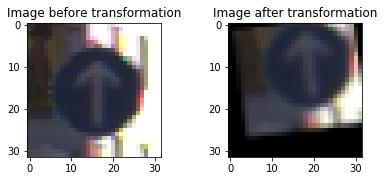

In [5]:
%matplotlib inline

# Visualization of the transformed image

print("===== TRANSFORMED DATA VISUALIZATION =====")

index = np.random.randint(0, len(X_train_init))
image = X_train_init[index].squeeze()
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Image before transformation")

image_transform = transform_image(image, ANGLE, TRANSLATION)
plt.subplot(1, 2, 2)
plt.imshow(image_transform)
plt.title("Image after transformation")
plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [8]:
def data_augmentation(X, y, n):
    
    """
    Perform augmentation on the input data
    Augmented data will be saved to file after each 1000 iteration
    
    Input parameters:
        * X: Image data
        * y: Labels
        * n: number of images created from transformation
    """
    
    new_X = np.copy(X)
    new_y = np.copy(y)
    
    # Record time elapsed for the data augmentation
    start_time = time.time()
    last_time = time.time()
    
    for i in range(n):
        index = np.random.randint(0, len(X))
        image = X[index]
        image_transformed = transform_image(image, ANGLE, TRANSLATION)
        image_transformed = np.expand_dims(image_transformed, axis=0)
        new_X = np.append(new_X, image_transformed, axis=0)
        new_y = np.append(new_y, y[index])
        
        if (i+1) % 1000 == 0 or i == 0 or (i+1) == n:
            aug_data_file = "./traffic-signs-data/train_aug.p"
            aug_data = {'features': new_X, 'labels': new_y}
            print("Saving to file --> ", aug_data_file)
            with open(aug_data_file, mode='wb') as f:
                pickle.dump(aug_data, f)
            print("Number of data %d -- Elapsed time %.2f sec" % (len(new_X), time.time() - last_time))
            last_time = time.time()
            
    total_time = time.time() - start_time
    print('Total elapsed time: %.2f sec' % (total_time))

In [ ]:
data_augmentation(X_train_init, y_train_init, NUM_NEW_IMAGES)

Saving to file -->  ./traffic-signs-data/train_aug.p
Number of data 68800 -- Elapsed time 1.29 sec
Saving to file -->  ./traffic-signs-data/train_aug.p
Number of data 69799 -- Elapsed time 104.81 sec
Saving to file -->  ./traffic-signs-data/train_aug.p
Number of data 70799 -- Elapsed time 112.21 sec
Saving to file -->  ./traffic-signs-data/train_aug.p
Number of data 71799 -- Elapsed time 105.93 sec
Saving to file -->  ./traffic-signs-data/train_aug.p
Number of data 72799 -- Elapsed time 107.79 sec
Saving to file -->  ./traffic-signs-data/train_aug.p
Number of data 73799 -- Elapsed time 110.38 sec
Saving to file -->  ./traffic-signs-data/train_aug.p
Number of data 74799 -- Elapsed time 108.90 sec
Saving to file -->  ./traffic-signs-data/train_aug.p
Number of data 75799 -- Elapsed time 109.71 sec
Saving to file -->  ./traffic-signs-data/train_aug.p
Number of data 76799 -- Elapsed time 105.55 sec
Saving to file -->  ./traffic-signs-data/train_aug.p
Number of data 77799 -- Elapsed time 107

In [ ]:
training_file_aug = "./traffic-signs-data/train_aug.p"
with open(training_file_aug, mode='rb') as f:
    train = pickle.load(f)
X_train_aug, y_train_aug = train['features'], train['labels']
n_train_aug = len(X_train_aug)
n_classes_aug = len(np.unique(y_train_aug))

print("===== DATA SUMMARY BEFORE AUGMENTATION =====")
print()
print("Number of training examples = {}".format(n_train_aug))
print("Number of classes = {}".format(n_classes_aug))
print()

In [ ]:
# Histogram for label distribution in training data
plt.subplots(1,2,1)
plt.hist(y_train_init, bins=n_classes, rwidth=0.8)
plt.title('Training data (size {}) class distribution before augmentation'.format(len(y_train_init))
plt.xlabel('Class Id')
plt.ylabel('Frequency');

plt.subplots(1,2,2)
plt.hist(y_train_aug, bins=n_classes, rwidth=0.8)
plt.title('Training data (size {}) class distribution after augmentation'.format(len(y_train_aug))
plt.xlabel('Class Id')
plt.ylabel('Frequency');
plt.show()